# Explore TRI facilities in Chicago

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping
import numpy as np
from pathlib import Path
from functools import reduce


import warnings
warnings.simplefilter(action='ignore')

In [2]:
# read data in
df_in = pd.read_excel('../data/TRI-2018-US.xlsx')

In [3]:
# create copy of original data
df = df_in.copy()

In [4]:
# copying from initial exploration notebook
# drop columns I do not need
df = df.drop(['18. SIC 2',
 '19. SIC 3',
 '20. SIC 4',
 '21. SIC 5',
 '22. SIC 6',
 '24. NAICS 2',
 '25. NAICS 3',
 '26. NAICS 4',
 '27. NAICS 5',
 '28. NAICS 6',
 '32. SRS ID',
 '38. FORM TYPE',
 '55. 6.1 - POTW - TRNS RLSE',
 '56. 6.1 - POTW - TRNS TRT',
 '57. POTW - TOTAL TRANSFERS',
 '58. 6.2 - M10',
 '59. 6.2 - M41',
 '60. 6.2 - M62',
 '61. 6.2 - M40 METAL',
 '62. 6.2 - M61 METAL',
 '63. 6.2 - M71',
 '64. 6.2 - M81',
 '65. 6.2 - M82',
 '66. 6.2 - M72',
 '67. 6.2 - M63',
 '68. 6.2 - M66',
 '69. 6.2 - M67',
 '70. 6.2 - M64',
 '71. 6.2 - M65',
 '72. 6.2 - M73',
 '73. 6.2 - M79',
 '74. 6.2 - M90',
 '75. 6.2 - M94',
 '76. 6.2 - M99',
 '78. 6.2 - M20',
 '79. 6.2 - M24',
 '80. 6.2 - M26',
 '81. 6.2 - M28',
 '82. 6.2 - M93',
 '84. 6.2 - M56',
 '85. 6.2 - M92',
 '87. 6.2 - M40 NON-METAL',
 '88. 6.2 - M50',
 '89. 6.2 - M54',
 '90. 6.2 - M61 NON-METAL',
 '91. 6.2 - M69',
 '92. 6.2 - M95'], axis=1)

In [5]:
# remove leading numbers, periods, and space and from column names
df.columns = df.columns.str.lstrip('0123456789.- ')

df.sample(5)

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,...,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM
58483,2018,52361KNZMNI80AT,110020518830,KINZE MANUFACTURING INC,2172 M AVE,WILLIAMSBURG,IOWA,IA,52361,NaN,...,0.0,607.0,0.0,0.0,607.0,NaN,ACTIVITY,1.00,NaN,NaN
45310,2018,15059WSTHMONE12,110007336579,WHEMCO-STEEL CASTINGS INC,12 TH ST,MIDLAND,BEAVER,PA,15059,NaN,...,0.0,0.0,0.0,0.0,10843.1,NaN,PRODUCTION,1.06,WHEMCO INC,142366165
43827,2018,46312PLLTN4343K,110000397874,TRADEBE TREATMENT & RECYCLING LLC,4343 KENNEDY AVE,EAST CHICAGO,LAKE,IN,46312,NaN,...,0.0,0.0,0.0,1174.0,17098.0,NaN,PRODUCTION,0.52,TRADEBE GP,20221619
63180,2018,30680STPNCOLDHI,110000358817,STEPAN CO,951 BANKHEAD HWY,WINDER,BARROW,GA,30680,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,PRODUCTION,0.78,STEPAN CO,5130182
75109,2018,14048DNKRK1ICEC,110000326442,FIELDBROOK FOODS CORP,ONE ICE CREAM DR,DUNKIRK,CHAUTAUQUA,NY,14048,NaN,...,0.0,0.0,0.0,15253.0,15253.0,NaN,PRODUCTION,1.00,NaN,NaN


In [6]:
# isolate all facilities in Chicago
chicago = df.loc[(df['ST'] == 'IL') & (df['CITY'] == 'CHICAGO')]

chicago.head()

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,...,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM
141,2018,60657CRFTS1239W,110000436001,CRAFTSMAN PLATING & TINNING CORP,1239 W SCHOOL ST,CHICAGO,COOK,IL,60657,NaN,...,0.0,0.0,0.0,0.0,1722.0,200.0,ACTIVITY,0.67,NaN,NaN
675,2018,60609CDPRD6W41S,110003064184,ACID PRODUCTS CO INC,600 W 41ST ST,CHICAGO,COOK,IL,60609,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,ACID PRODUCTS CO INC,148314503
831,2018,60618HFRDY3232N,110000434423,HU-FRIEDY MFG CO LLC,3232 N ROCKWELL ST,CHICAGO,COOK,IL,60618,NaN,...,0.0,0.0,0.0,6716.0,14677.0,NaN,ACTIVITY,1.18,NaN,NaN
1592,2018,60650GRDNR4718R,110000435869,GAC CHICAGO INC,4718 W. ROOSEVELT ROAD,CHICAGO,COOK,IL,60644,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,GARDNER INDUSTRIES INC,41495490
1725,2018,60609MRCNN1101W,110000434147,ARDAGH METAL BEVERAGE USA INC RE : CHICAGO PLANT,1101 W 43RD ST,CHICAGO,COOK,IL,60609,NaN,...,0.0,0.0,30212.0,0.0,124293.0,NaN,PRODUCTION,1.30,ARDAGH HOLDINGS USA INC,80376954


### Wrangle census tract data

I want to look at some socio-demographic characteristics of populations that may be more exposed to toxic pollution. All census tables were downloaded from [DATA.CENSUS.GOV](data.census.gov), and are the 2018 5-year estimates for census tracts in Cook County, Illinois. I'm going to look at age groups under 5 and over 65, percent below poverty, percent of adults with less than high school education, percent uninsured, and percent limited english speaking households. After wrangling the data and joining to Illinois census tracts, I am going to clip the tracts by a Chicago outline.

#### Age and Sex

This table will give me age groups and total population for each census tract.

In [2]:
# read population data in
pop_in = pd.read_csv('../data/census-tables/2018-chicago-population-data.csv', encoding='latin-1', header=1)
list(pop_in.columns)

['id',
 'Geographic Area Name',
 'Estimate!!Total!!Total population',
 'Margin of Error!!Total MOE!!Total population',
 'Estimate!!Percent!!Total population',
 'Margin of Error!!Percent MOE!!Total population',
 'Estimate!!Male!!Total population',
 'Margin of Error!!Male MOE!!Total population',
 'Estimate!!Percent Male!!Total population',
 'Margin of Error!!Percent Male MOE!!Total population',
 'Estimate!!Female!!Total population',
 'Margin of Error!!Female MOE!!Total population',
 'Estimate!!Percent Female!!Total population',
 'Margin of Error!!Percent Female MOE!!Total population',
 'Estimate!!Total!!Total population!!AGE!!Under 5 years',
 'Margin of Error!!Total MOE!!Total population!!AGE!!Under 5 years',
 'Estimate!!Percent!!Total population!!AGE!!Under 5 years',
 'Margin of Error!!Percent MOE!!Total population!!AGE!!Under 5 years',
 'Estimate!!Male!!Total population!!AGE!!Under 5 years',
 'Margin of Error!!Male MOE!!Total population!!AGE!!Under 5 years',
 'Estimate!!Percent Male!!T

I am interested in the most vulnerable populations to toxic pollution, under 5 and over 65. So I will keep the id field to use for joining, the percent under 5 years field, and the fields I need to calculate for percent over 65 (65 to 69, 70 to 74, 75 to 79, 80 to 84, and over 85). I'll also keep the total population field to use for calculating population density later on.

In [3]:
# create new population dataframe by filtering the columns I need
pop = pop_in.filter(['id', 'Geographic Area Name', 'Estimate!!Total!!Total population', 'Estimate!!Percent!!Total population!!AGE!!Under 5 years', 'Estimate!!Percent!!Total population!!AGE!!65 to 69 years', 'Estimate!!Percent!!Total population!!AGE!!70 to 74 years', 'Estimate!!Percent!!Total population!!AGE!!75 to 79 years', 'Estimate!!Percent!!Total population!!AGE!!80 to 84 years', 'Estimate!!Percent!!Total population!!AGE!!85 years and over'], axis =1)

# create list of fields for over 65
over65 = ['Estimate!!Percent!!Total population!!AGE!!65 to 69 years', 'Estimate!!Percent!!Total population!!AGE!!70 to 74 years', 'Estimate!!Percent!!Total population!!AGE!!75 to 79 years', 'Estimate!!Percent!!Total population!!AGE!!80 to 84 years', 'Estimate!!Percent!!Total population!!AGE!!85 years and over']

# some rows had a '-' for a null value
# replace these with nans
pop = pop.replace(r'-', np.nan)

# cast percent columns to float
pop['Estimate!!Percent!!Total population!!AGE!!Under 5 years'] = pop['Estimate!!Percent!!Total population!!AGE!!Under 5 years'].astype(float)
pop[over65] = pop[over65].astype(float)

# calculate percent over 65 field
pop['over65'] = pop[over65].sum(axis=1)

# delete individual columns used to calculate over 65 field
pop = pop.drop(over65, axis=1)

# rename columns
pop = pop.rename(columns={'Geographic Area Name': 'name',
                          'Estimate!!Total!!Total population': 'totalPop',
                          'Estimate!!Percent!!Total population!!AGE!!Under 5 years': 'under5'})

pop.head()

,id,name,totalPop,under5,over65
0,1400000US17031010100,"Census Tract 101, Cook County, Illinois",4522,8.5,5.6
1,1400000US17031010201,"Census Tract 102.01, Cook County, Illinois",7039,6.8,6.5
2,1400000US17031010202,"Census Tract 102.02, Cook County, Illinois",2852,8.6,13.4
3,1400000US17031010300,"Census Tract 103, Cook County, Illinois",6650,5.3,18.8
4,1400000US17031010400,"Census Tract 104, Cook County, Illinois",5153,1.6,6.6


#### Health Insurance Coverage Status By Sex By Age

In [4]:
# read insurance coverage data in
insurance_in = pd.read_csv('../data/census-tables/2018-chicago-insurance-data.csv', encoding='latin-1', header=1)
list(insurance_in.columns)

['id',
 'Geographic Area Name',
 'Estimate!!Total',
 'Margin of Error!!Total',
 'Estimate!!Total!!Male',
 'Margin of Error!!Total!!Male',
 'Estimate!!Total!!Male!!Under 6 years',
 'Margin of Error!!Total!!Male!!Under 6 years',
 'Estimate!!Total!!Male!!Under 6 years!!With health insurance coverage',
 'Margin of Error!!Total!!Male!!Under 6 years!!With health insurance coverage',
 'Estimate!!Total!!Male!!Under 6 years!!No health insurance coverage',
 'Margin of Error!!Total!!Male!!Under 6 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!6 to 18 years',
 'Margin of Error!!Total!!Male!!6 to 18 years',
 'Estimate!!Total!!Male!!6 to 18 years!!With health insurance coverage',
 'Margin of Error!!Total!!Male!!6 to 18 years!!With health insurance coverage',
 'Estimate!!Total!!Male!!6 to 18 years!!No health insurance coverage',
 'Margin of Error!!Total!!Male!!6 to 18 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!19 to 25 years',
 'Margin of Error!!Total!!Male!!19 to 

I only want to keep the identifying columns, and I ultimately need a column for total uninsured.

In [5]:
# first filter to keep columns that contain estimate, to eliminate the margin of error columns
colNames = insurance_in.columns.str.contains('id|Estimate', case=False)
insurance_filter = insurance_in.iloc[:, colNames]
list(insurance_filter.columns)

['id',
 'Estimate!!Total',
 'Estimate!!Total!!Male',
 'Estimate!!Total!!Male!!Under 6 years',
 'Estimate!!Total!!Male!!Under 6 years!!With health insurance coverage',
 'Estimate!!Total!!Male!!Under 6 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!6 to 18 years',
 'Estimate!!Total!!Male!!6 to 18 years!!With health insurance coverage',
 'Estimate!!Total!!Male!!6 to 18 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!19 to 25 years',
 'Estimate!!Total!!Male!!19 to 25 years!!With health insurance coverage',
 'Estimate!!Total!!Male!!19 to 25 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!26 to 34 years',
 'Estimate!!Total!!Male!!26 to 34 years!!With health insurance coverage',
 'Estimate!!Total!!Male!!26 to 34 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!35 to 44 years',
 'Estimate!!Total!!Male!!35 to 44 years!!With health insurance coverage',
 'Estimate!!Total!!Male!!35 to 44 years!!No health insurance coverage',
 'Estimate!!T

In [6]:
# create list of all columns that describe a group with no health coverage
colNames = insurance_filter.columns.str.contains('No', case=False)
no_insurance = insurance_filter.iloc[:, colNames]
col_list = list(no_insurance.columns)
col_list

['Estimate!!Total!!Male!!Under 6 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!6 to 18 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!19 to 25 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!26 to 34 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!35 to 44 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!45 to 54 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!55 to 64 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!65 to 74 years!!No health insurance coverage',
 'Estimate!!Total!!Male!!75 years and over!!No health insurance coverage',
 'Estimate!!Total!!Female!!Under 6 years!!No health insurance coverage',
 'Estimate!!Total!!Female!!6 to 18 years!!No health insurance coverage',
 'Estimate!!Total!!Female!!19 to 25 years!!No health insurance coverage',
 'Estimate!!Total!!Female!!26 to 34 years!!No health insurance coverage',
 'Estimate!!Total!!Female!!35 to 44 years!!No health insu

In [7]:
# create new field that is the sum of all columns describing groups with no health coverage
insurance_filter['totalUninsured'] = insurance_filter[col_list].sum(axis=1)

# create new insurance dataframe by filtering only the columns I need
insurance_coverage = insurance_filter.filter(['id', 'totalUninsured'])

# rename columns
insurance_coverage.head()

,id,totalUninsured
0,1400000US17031310900,908
1,1400000US17031420500,124
2,1400000US17031430400,139
3,1400000US17031430600,90
4,1400000US17031440900,268


In [8]:
# view insurance coverage statistics
insurance_coverage.describe()

,totalUninsured
count,1319.000000
mean,373.201668
std,328.527577
min,0.000000
25%,136.500000
50%,277.000000
75%,500.500000
max,2457.000000


#### Poverty Status in the past 12 months

In [9]:
# read poverty data in
poverty_in = pd.read_csv('../data/census-tables/2018-chicago-poverty-data.csv', encoding='latin-1', header=1)
list(poverty_in.columns)

['id',
 'Geographic Area Name',
 'Estimate!!Total!!Population for whom poverty status is determined',
 'Margin of Error!!Total MOE!!Population for whom poverty status is determined',
 'Estimate!!Below poverty level!!Population for whom poverty status is determined',
 'Margin of Error!!Below poverty level MOE!!Population for whom poverty status is determined',
 'Estimate!!Percent below poverty level!!Population for whom poverty status is determined',
 'Margin of Error!!Percent below poverty level MOE!!Population for whom poverty status is determined',
 'Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years',
 'Margin of Error!!Total MOE!!Population for whom poverty status is determined!!AGE!!Under 18 years',
 'Estimate!!Below poverty level!!Population for whom poverty status is determined!!AGE!!Under 18 years',
 'Margin of Error!!Below poverty level MOE!!Population for whom poverty status is determined!!AGE!!Under 18 years',
 'Estimate!!Percent below pov

I just want to keep the identifying fields, and there is already a column for the percent below poverty level so I will not need to calculate that field from population totals.

In [10]:
# create poverty dataframe by filtering the columns I need
# for this one I can just keep the id field which will be used to join later, and the percent below poverty level
poverty_level = poverty_in.filter(['id', 'Estimate!!Percent below poverty level!!Population for whom poverty status is determined'])

# rename columns
poverty_level = poverty_level.rename(columns={'Geographic Area Name': 'name',
                                                        'Estimate!!Percent below poverty level!!Population for whom poverty status is determined': 'percentBelowPoverty'})

# some rows had a '-' for a null value
# replace these with nans
poverty_level = poverty_level.replace(r'-', np.nan)

# cast column to float
poverty_level['percentBelowPoverty'] = poverty_level['percentBelowPoverty'].astype(float)

In [11]:
poverty_level.describe()

,percentBelowPoverty
count,1315.000000
mean,17.136122
std,12.928747
min,0.300000
25%,6.950000
50%,13.500000
75%,24.300000
max,77.100000


#### Place of birth by education attainment in the United States (population 25 years and over in the United States)

This table will give me the percent population with less than high school education.

In [12]:
# read income data in
education_in = pd.read_csv('../data/census-tables/2018-chicago-education-data.csv', encoding='latin-1', header=1)
list(education_in.columns)

['id',
 'Geographic Area Name',
 'Estimate!!Total',
 'Margin of Error!!Total',
 'Estimate!!Total!!Less than high school graduate',
 'Margin of Error!!Total!!Less than high school graduate',
 'Estimate!!Total!!High school graduate (includes equivalency)',
 'Margin of Error!!Total!!High school graduate (includes equivalency)',
 "Estimate!!Total!!Some college or associate's degree",
 "Margin of Error!!Total!!Some college or associate's degree",
 "Estimate!!Total!!Bachelor's degree",
 "Margin of Error!!Total!!Bachelor's degree",
 'Estimate!!Total!!Graduate or professional degree',
 'Margin of Error!!Total!!Graduate or professional degree',
 'Estimate!!Total!!Born in state of residence',
 'Margin of Error!!Total!!Born in state of residence',
 'Estimate!!Total!!Born in state of residence!!Less than high school graduate',
 'Margin of Error!!Total!!Born in state of residence!!Less than high school graduate',
 'Estimate!!Total!!Born in state of residence!!High school graduate (includes equivale

I only need to keep the id field, and the total number with less than high school education.

In [13]:
# create new education dataframe by filtering the columns I need
education = education_in.filter(['id', 'Estimate!!Total!!Less than high school graduate'], axis =1)

# rename columns
education = education.rename(columns={'Estimate!!Total!!Less than high school graduate': 'highSchoolEd'})

education.head()

,id,highSchoolEd
0,1400000US17031823705,351
1,1400000US17031110200,300
2,1400000US17031071700,4
3,1400000US17031826901,225
4,1400000US17031817500,455


#### Limited english speaking households

In [14]:
# read english data in
english_in = pd.read_csv('../data/census-tables/2018-chicago-english-data.csv', encoding='latin-1', header=1)
list(english_in.columns)

['id',
 'Geographic Area Name',
 'Estimate!!Total!!All households',
 'Margin of Error!!Total MOE!!All households',
 'Estimate!!Percent!!All households',
 'Margin of Error!!Percent MOE!!All households',
 'Estimate!!Limited English-speaking households!!All households',
 'Margin of Error!!Limited English-speaking households MOE!!All households',
 'Estimate!!Percent limited English-speaking households!!All households',
 'Margin of Error!!Percent limited English-speaking households MOE!!All households',
 'Estimate!!Total!!All households!!Households speaking --!!Spanish',
 'Margin of Error!!Total MOE!!All households!!Households speaking --!!Spanish',
 'Estimate!!Percent!!All households!!Households speaking --!!Spanish',
 'Margin of Error!!Percent MOE!!All households!!Households speaking --!!Spanish',
 'Estimate!!Limited English-speaking households!!All households!!Households speaking --!!Spanish',
 'Margin of Error!!Limited English-speaking households MOE!!All households!!Households speaking

I only need to keep the id field, the total number of limited english housesholds, and the percent of limited-english speaking households.

In [15]:
# create new english dataframe by filtering the columns I need
english = english_in.filter(['id', 'Estimate!!Limited English-speaking households!!All households', 'Estimate!!Percent limited English-speaking households!!All households'], axis =1)

# rename columns
english = english.rename(columns={'Estimate!!Limited English-speaking households!!All households': 'totalLimitedEnglish',
                                    'Estimate!!Percent limited English-speaking households!!All households': 'percentLimitedEnglish'})

# some rows had a '-' for a null value
# replace these with nans
english = english.replace(r'-', np.nan)

# cast column to float
english['percentLimitedEnglish'] = english['percentLimitedEnglish'].astype(float)

english.head()

,id,totalLimitedEnglish,percentLimitedEnglish
0,1400000US17031010100,112,4.8
1,1400000US17031010201,355,13.2
2,1400000US17031010202,68,6.2
3,1400000US17031010300,248,8.2
4,1400000US17031010400,82,4.2


### Merging the wrangled census datasets together

In [16]:
# create list dataframes to be merged
data_frames = [pop, poverty_level, education, english, insurance_coverage]

# join list of dataframes
census_data = reduce(lambda left,right: pd.merge(left,right,on=['id'],
                                            how='left'), data_frames)

census_data.head()

,id,name,totalPop,under5,over65,percentBelowPoverty,highSchoolEd,totalLimitedEnglish,percentLimitedEnglish,totalUninsured
0,1400000US17031010100,"Census Tract 101, Cook County, Illinois",4522,8.5,5.6,35.8,340,112,4.8,378
1,1400000US17031010201,"Census Tract 102.01, Cook County, Illinois",7039,6.8,6.5,36.8,974,355,13.2,795
2,1400000US17031010202,"Census Tract 102.02, Cook County, Illinois",2852,8.6,13.4,18.5,408,68,6.2,588
3,1400000US17031010300,"Census Tract 103, Cook County, Illinois",6650,5.3,18.8,16.1,602,248,8.2,860
4,1400000US17031010400,"Census Tract 104, Cook County, Illinois",5153,1.6,6.6,19.1,86,82,4.2,449


In [17]:
# split name column into separate columns for tract, county, and state
census_data['censusTract'], census_data['county'], census_data['state'] = census_data['name'].str.split(', ', 2).str

# grab last eleven digits from the id field to create a GEOID field for joining to shapefile
census_data['GEOID'] = census_data['id'].str[-11:]

census_data.head()

,id,name,totalPop,under5,over65,percentBelowPoverty,highSchoolEd,totalLimitedEnglish,percentLimitedEnglish,totalUninsured,censusTract,county,state,GEOID
0,1400000US17031010100,"Census Tract 101, Cook County, Illinois",4522,8.5,5.6,35.8,340,112,4.8,378,Census Tract 101,Cook County,Illinois,17031010100
1,1400000US17031010201,"Census Tract 102.01, Cook County, Illinois",7039,6.8,6.5,36.8,974,355,13.2,795,Census Tract 102.01,Cook County,Illinois,17031010201
2,1400000US17031010202,"Census Tract 102.02, Cook County, Illinois",2852,8.6,13.4,18.5,408,68,6.2,588,Census Tract 102.02,Cook County,Illinois,17031010202
3,1400000US17031010300,"Census Tract 103, Cook County, Illinois",6650,5.3,18.8,16.1,602,248,8.2,860,Census Tract 103,Cook County,Illinois,17031010300
4,1400000US17031010400,"Census Tract 104, Cook County, Illinois",5153,1.6,6.6,19.1,86,82,4.2,449,Census Tract 104,Cook County,Illinois,17031010400


In [18]:
# calculate percent uninsured
census_data['percentUninsured'] = census_data['totalUninsured']/census_data['totalPop']*100

# calculate percent under 5
census_data['percentUnder5'] = census_data['under5']/census_data['totalPop']*100

# calculate percent with less than high school education
census_data['percentHighSchool'] = census_data['highSchoolEd']/census_data['totalPop']*100

census_data.head()

,id,name,totalPop,under5,over65,percentBelowPoverty,highSchoolEd,totalLimitedEnglish,percentLimitedEnglish,totalUninsured,censusTract,county,state,GEOID,percentUninsured,percentUnder5,percentHighSchool
0,1400000US17031010100,"Census Tract 101, Cook County, Illinois",4522,8.5,5.6,35.8,340,112,4.8,378,Census Tract 101,Cook County,Illinois,17031010100,8.359133,0.187970,7.518797
1,1400000US17031010201,"Census Tract 102.01, Cook County, Illinois",7039,6.8,6.5,36.8,974,355,13.2,795,Census Tract 102.01,Cook County,Illinois,17031010201,11.294218,0.096605,13.837193
2,1400000US17031010202,"Census Tract 102.02, Cook County, Illinois",2852,8.6,13.4,18.5,408,68,6.2,588,Census Tract 102.02,Cook County,Illinois,17031010202,20.617111,0.301543,14.305750
3,1400000US17031010300,"Census Tract 103, Cook County, Illinois",6650,5.3,18.8,16.1,602,248,8.2,860,Census Tract 103,Cook County,Illinois,17031010300,12.932331,0.079699,9.052632
4,1400000US17031010400,"Census Tract 104, Cook County, Illinois",5153,1.6,6.6,19.1,86,82,4.2,449,Census Tract 104,Cook County,Illinois,17031010400,8.713371,0.031050,1.668931


### Join census data to census tract shapefile

In [19]:
# read shapefile in
tracts = gpd.read_file('../data/illinois-tracts-shapefile/tl_2019_17_tract.shp')
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,091,011700,17091011700,117,Census Tract 117,G5020,S,2370100,102060,+41.1294653,-087.8735796,"POLYGON ((-87.88768 41.13594, -87.88764 41.136..."
1,17,091,011800,17091011800,118,Census Tract 118,G5020,S,1791332,55670,+41.1403452,-087.8760059,"POLYGON ((-87.89410 41.14388, -87.89400 41.143..."
2,17,119,400951,17119400951,4009.51,Census Tract 4009.51,G5020,S,5169973,169066,+38.7277628,-090.1002620,"POLYGON ((-90.11192 38.70281, -90.11128 38.703..."
3,17,119,400952,17119400952,4009.52,Census Tract 4009.52,G5020,S,5751299,305906,+38.7301416,-090.0827783,"POLYGON ((-90.09442 38.72031, -90.09360 38.720..."
4,17,135,957500,17135957500,9575,Census Tract 9575,G5020,S,450037682,512225,+39.3934535,-089.5975234,"POLYGON ((-89.70369 39.34803, -89.69928 39.348..."


In [20]:
# filter to drop unneccessary columns
tracts = tracts.filter(['GEOID', 'NAME', 'NAMELSAD', 'ALAND', 'geometry'], axis=1)
tracts.head()

,GEOID,NAME,NAMELSAD,ALAND,geometry
0,17091011700,117,Census Tract 117,2370100,"POLYGON ((-87.88768 41.13594, -87.88764 41.136..."
1,17091011800,118,Census Tract 118,1791332,"POLYGON ((-87.89410 41.14388, -87.89400 41.143..."
2,17119400951,4009.51,Census Tract 4009.51,5169973,"POLYGON ((-90.11192 38.70281, -90.11128 38.703..."
3,17119400952,4009.52,Census Tract 4009.52,5751299,"POLYGON ((-90.09442 38.72031, -90.09360 38.720..."
4,17135957500,9575,Census Tract 9575,450037682,"POLYGON ((-89.70369 39.34803, -89.69928 39.348..."


In [21]:
# join census data to shapefile, using right join to keep only the tracts I have data for
census_tracts = pd.merge(tracts, census_data, on='GEOID', how='right')
census_tracts.head()

,GEOID,NAME,NAMELSAD,ALAND,geometry,id,name,totalPop,under5,over65,...,highSchoolEd,totalLimitedEnglish,percentLimitedEnglish,totalUninsured,censusTract,county,state,percentUninsured,percentUnder5,percentHighSchool
0,17031010300,103,Census Tract 103,472017,"POLYGON ((-87.67133 42.01937, -87.67121 42.019...",1400000US17031010300,"Census Tract 103, Cook County, Illinois",6650,5.3,18.8,...,602,248,8.2,860,Census Tract 103,Cook County,Illinois,12.932331,0.079699,9.052632
1,17031010400,104,Census Tract 104,548761,"POLYGON ((-87.66345 42.01283, -87.66321 42.012...",1400000US17031010400,"Census Tract 104, Cook County, Illinois",5153,1.6,6.6,...,86,82,4.2,449,Census Tract 104,Cook County,Illinois,8.713371,0.031050,1.668931
2,17031010600,106,Census Tract 106,495017,"POLYGON ((-87.67059 42.00537, -87.67046 42.005...",1400000US17031010600,"Census Tract 106, Cook County, Illinois",6271,4.6,7.8,...,363,301,10.5,1110,Census Tract 106,Cook County,Illinois,17.700526,0.073354,5.788550
3,17031020100,201,Census Tract 201,411155,"POLYGON ((-87.69024 42.01264, -87.69024 42.012...",1400000US17031020100,"Census Tract 201, Cook County, Illinois",3836,7.2,12.9,...,455,211,13.6,569,Census Tract 201,Cook County,Illinois,14.833160,0.187696,11.861314
4,17031280800,2808,Census Tract 2808,237357,"POLYGON ((-87.69150 41.88111, -87.69147 41.881...",1400000US17031280800,"Census Tract 2808, Cook County, Illinois",888,0.1,19.2,...,141,9,2.5,121,Census Tract 2808,Cook County,Illinois,13.626126,0.011261,15.878378


In [22]:
# drop redundant columns
census_tracts = census_tracts.drop(['NAMELSAD', 'id', 'NAME', 'name'], axis=1)

# create a column with land area in square miles, converted from square meters
census_tracts['ALANDsquareMiles'] = census_tracts['ALAND'] / 2589988.110336

# create population density column
census_tracts['popDensity'] = census_tracts['totalPop']/census_tracts['ALANDsquareMiles']

census_tracts.head()

,GEOID,ALAND,geometry,totalPop,under5,over65,percentBelowPoverty,highSchoolEd,totalLimitedEnglish,percentLimitedEnglish,totalUninsured,censusTract,county,state,percentUninsured,percentUnder5,percentHighSchool,ALANDsquareMiles,popDensity
0,17031010300,472017,"POLYGON ((-87.67133 42.01937, -87.67121 42.019...",6650,5.3,18.8,16.1,602,248,8.2,860,Census Tract 103,Cook County,Illinois,12.932331,0.079699,9.052632,0.182247,36488.984367
1,17031010400,548761,"POLYGON ((-87.66345 42.01283, -87.66321 42.012...",5153,1.6,6.6,19.1,86,82,4.2,449,Census Tract 104,Cook County,Illinois,8.713371,0.031050,1.668931,0.211878,24320.621787
2,17031010600,495017,"POLYGON ((-87.67059 42.00537, -87.67046 42.005...",6271,4.6,7.8,24.4,363,301,10.5,1110,Census Tract 106,Cook County,Illinois,17.700526,0.073354,5.788550,0.191127,32810.621534
3,17031020100,411155,"POLYGON ((-87.69024 42.01264, -87.69024 42.012...",3836,7.2,12.9,14.2,455,211,13.6,569,Census Tract 201,Cook County,Illinois,14.833160,0.187696,11.861314,0.158748,24164.109378
4,17031280800,237357,"POLYGON ((-87.69150 41.88111, -87.69147 41.881...",888,0.1,19.2,30.3,141,9,2.5,121,Census Tract 2808,Cook County,Illinois,13.626126,0.011261,15.878378,0.091644,9689.663427


In [25]:
# read in Chicago outline geojson
chicago = gpd.read_file('../data/chicago-outline.geojson')

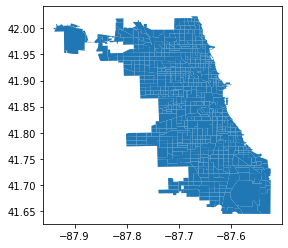

In [27]:
# clip census tracts by Chicago outline
chicago_clip = gpd.overlay(chicago, census_tracts, how='intersection')

# inspect results
chicago_clip.plot();

In [30]:
# convert crs to WGS84 for web mapping
chicago_clip = chicago_clip.to_crs({'init': 'epsg:4326'})

# write joined census data to geojson
chicago_clip.to_file("../data/chicago-tracts.geojson", driver='GeoJSON')